# task 1

Original Image:


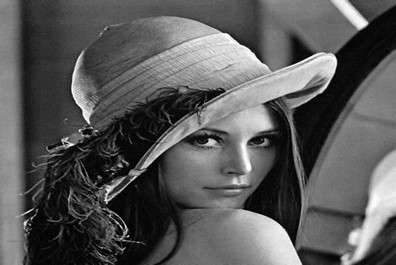

Resized - Linear Interpolation:


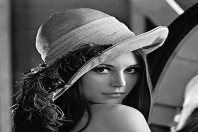

Resized - Nearest Neighbors Interpolation:


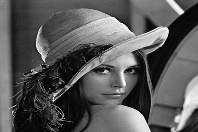

Resized - Cubic Interpolation:


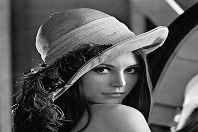

Blurred - Box Blurring:


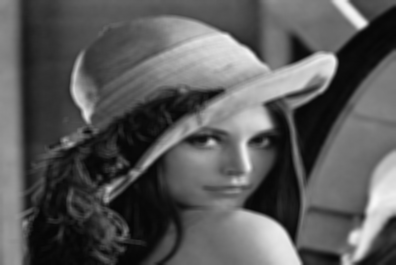

Blurred - Gaussian Blurring:


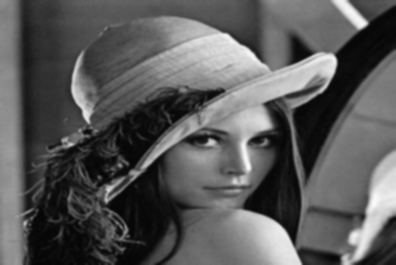

Blurred - Adaptive Blurring:


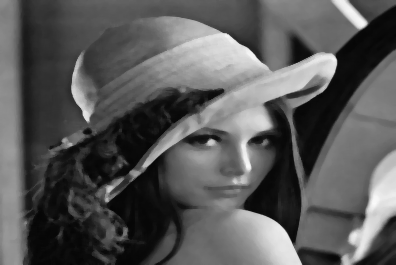

True

In [2]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
image = cv2.imread('/content/Picture2.jpg')

# Check if the image is loaded correctly
if image is None:
    print("Error: Could not load the image. Check the file path!")
    exit()

# Display original image
print("Original Image:")
cv2_imshow(image)

# Image Resizing
# Define new dimensions
scale_percent = 50
width = int(image.shape[1] * scale_percent / 100)
height = int(image.shape[0] * scale_percent / 100)
new_dimensions = (width, height)

# Linear Interpolation
resized_linear = cv2.resize(image, new_dimensions, interpolation=cv2.INTER_LINEAR)
print("Resized - Linear Interpolation:")
cv2_imshow(resized_linear)

# Nearest Neighbors Interpolation
resized_nearest = cv2.resize(image, new_dimensions, interpolation=cv2.INTER_NEAREST)
print("Resized - Nearest Neighbors Interpolation:")
cv2_imshow(resized_nearest)

# Polynomial (Cubic) Interpolation
resized_cubic = cv2.resize(image, new_dimensions, interpolation=cv2.INTER_CUBIC)
print("Resized - Cubic Interpolation:")
cv2_imshow(resized_cubic)

# Image Blurring
kernel_size = (5, 5)

# Box Blurring
blurred_box = cv2.blur(image, kernel_size)
print("Blurred - Box Blurring:")
cv2_imshow(blurred_box)

# Gaussian Blurring
blurred_gaussian = cv2.GaussianBlur(image, kernel_size, sigmaX=0)
print("Blurred - Gaussian Blurring:")
cv2_imshow(blurred_gaussian)

# Adaptive Blurring (Median Blurring)
# Kernel size for median filter -> odd number
blurred_adaptive = cv2.medianBlur(image, 5)
print("Blurred - Adaptive Blurring:")
cv2_imshow(blurred_adaptive)

# saving images
cv2.imwrite('resized_linear.jpg', resized_linear)
cv2.imwrite('resized_nearest.jpg', resized_nearest)
cv2.imwrite('resized_cubic.jpg', resized_cubic)
cv2.imwrite('blurred_box.jpg', blurred_box)
cv2.imwrite('blurred_gaussian.jpg', blurred_gaussian)
cv2.imwrite('blurred_adaptive.jpg', blurred_adaptive)


# task 2

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

(X, y), (X_test, y_test) = mnist.load_data()

# Flatten images
X = X.reshape(-1, 784).astype('float32') / 255.0
X_test = X_test.reshape(-1, 784).astype('float32') / 255.0

# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Binarize the labels for multi-class ROC
y_train_bin = label_binarize(y_train, classes=np.unique(y))
y_test_bin = label_binarize(y_test, classes=np.unique(y))

# Define models
models = {
    "Naive Bayes": GaussianNB(),
    "Random Forest": OneVsRestClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
}

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = {}


Model: Naive Bayes
Cross-validated Accuracy: 0.5575
AUC: 0.9298
Accuracy: 0.5526
Precision: 0.6898
Recall: 0.5526
F1-Score: 0.5163
Confusion Matrix:
[[ 848    1    1    5    3    5   48    1   31   37]
 [   0 1086    2    1    0    0   11    0   31    4]
 [  75   28  262   94    6    1  285    4  252   25]
 [  30   40    6  370    1    3   72    8  358  122]
 [  14    2    3    4  206    6   84    7  147  509]
 [  64   27    1   22    3   44   56    2  563  110]
 [  10   13    3    1    1    6  902    0   21    1]
 [   0   15    2   11    5    1    5  273   32  684]
 [  12   82    3    8    4   12   17    4  575  257]
 [   4    8    4    6    0    0    1   12   14  960]]


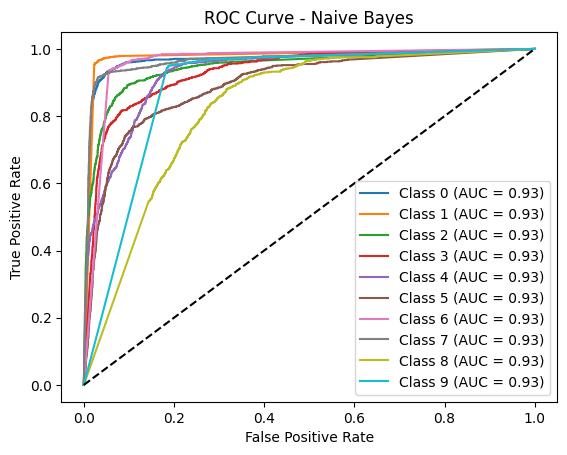


Model: Random Forest
Cross-validated Accuracy: 0.9632
AUC: 0.9981
Accuracy: 0.9007
Precision: 0.9445
Recall: 0.9007
F1-Score: 0.9122
Confusion Matrix:
[[ 978    0    0    0    0    0    1    1    0    0]
 [  23 1108    2    1    0    0    1    0    0    0]
 [ 106    0  917    0    0    0    2    4    3    0]
 [ 120    0    3  877    0    1    0    4    4    1]
 [ 112    0    0    0  858    0    4    0    1    7]
 [ 118    1    0    2    0  769    1    1    0    0]
 [  65    3    0    0    1    1  888    0    0    0]
 [  87    0    6    0    0    0    0  931    0    4]
 [ 153    0    1    1    1    1    1    1  813    2]
 [ 138    0    0    0    2    0    0    1    0  868]]


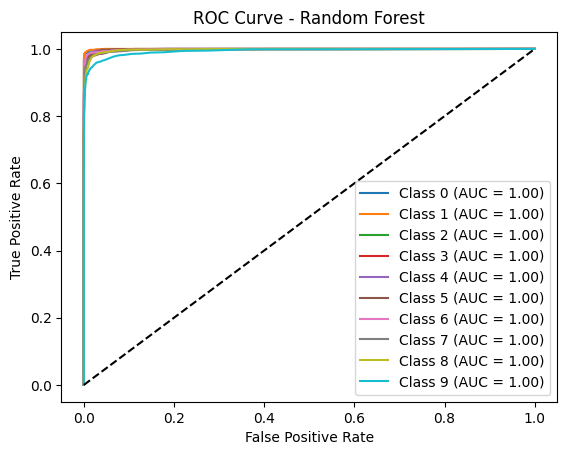


Model: Naive Bayes
Accuracy: 0.5526
Precision: 0.6898
Recall: 0.5526
F1-Score: 0.5163
Confusion Matrix:
[[ 848    1    1    5    3    5   48    1   31   37]
 [   0 1086    2    1    0    0   11    0   31    4]
 [  75   28  262   94    6    1  285    4  252   25]
 [  30   40    6  370    1    3   72    8  358  122]
 [  14    2    3    4  206    6   84    7  147  509]
 [  64   27    1   22    3   44   56    2  563  110]
 [  10   13    3    1    1    6  902    0   21    1]
 [   0   15    2   11    5    1    5  273   32  684]
 [  12   82    3    8    4   12   17    4  575  257]
 [   4    8    4    6    0    0    1   12   14  960]]
AUC: 0.9298

Model: Random Forest
Accuracy: 0.9007
Precision: 0.9445
Recall: 0.9007
F1-Score: 0.9122
Confusion Matrix:
[[ 978    0    0    0    0    0    1    1    0    0]
 [  23 1108    2    1    0    0    1    0    0    0]
 [ 106    0  917    0    0    0    2    4    3    0]
 [ 120    0    3  877    0    1    0    4    4    1]
 [ 112    0    0    0  858    0  

In [5]:
# Train and evaluate models
for model_name, model in models.items():
    print(f"\nModel: {model_name}")

    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
    print(f"Cross-validated Accuracy: {np.mean(cv_scores):.4f}")

    # Training on the full training set
    model.fit(X_train, y_train_bin if isinstance(model, OneVsRestClassifier) else y_train)

    # Predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None

    # Metrics
    if isinstance(model, GaussianNB):
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        conf_matrix = confusion_matrix(y_test, y_pred)
    else:
        accuracy = accuracy_score(y_test, y_pred.argmax(axis=1) if y_prob is not None else y_pred)
        precision = precision_score(y_test, y_pred.argmax(axis=1) if y_prob is not None else y_pred, average='weighted')
        recall = recall_score(y_test, y_pred.argmax(axis=1) if y_prob is not None else y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred.argmax(axis=1) if y_prob is not None else y_pred, average='weighted')
        conf_matrix = confusion_matrix(y_test, y_pred.argmax(axis=1) if y_prob is not None else y_pred)

    # ROC and AUC
    if y_prob is not None:
        roc_auc = roc_auc_score(y_test_bin, y_prob, multi_class='ovr', average='weighted')
        print(f"AUC: {roc_auc:.4f}")
    else:
        roc_auc = None

    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "Confusion Matrix": conf_matrix,
        "AUC": roc_auc
    }

    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Confusion Matrix:\n{conf_matrix}")

    # Plot ROC curve
    if y_prob is not None:
        plt.figure()
        for i in range(len(np.unique(y))):
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
            plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f"ROC Curve - {model_name}")
        plt.legend()
        plt.show()

# Summary of results
for model_name, metrics in results.items():
    print(f"\nModel: {model_name}")
    for metric, value in metrics.items():
        if metric == "Confusion Matrix":
            print(f"{metric}:\n{value}")
        else:
            print(f"{metric}: {value:.4f}" if value is not None else f"{metric}: N/A")
